# First, copy these words to impresso ngram site: 
https://impresso-project.ch/app/search/ngrams

In [ ]:
swiss = ["Bern", "Berne", 
         "Luzern", "Lucerne", 
         "Altdorf", 
         "Schwyz", "Schwytz",
         "Sarnen",
         "Stans",
         "Glarus", "Glaris",
         "Zug", "Zoug",
         "Freiburg", "Fribourg",
         "Solothurn", "Soleure",
         "Basel", "Bâle",
         "Liestal",
         "Schaffhausen", "Schaffhouse",
         "Herisau",
         "Appenzell",
         "Gallen", "Saint-Gall",
         "Chur", "Coire",
         "Aarau",
         "Frauenfeld",
         "Bellinzona", "Bellinzone",
         "Lausanne",
         "Sitten", "Sion",
         "Neuenburg", "Neuchâtel",
         "Genf", "Genève",
         "Delsberg", "Delémont"]

print("===COPYPASTE SWISS===")
print(' '.join(swiss))
print("=====================")


non_swiss = [
     "Paris",
     "Berlin", 
     "Wien", "Vienna",
     "Rom", "Rome",
     "London", "Londres",
     "Moskau", "Moscou",
     "Bonn",
     "Amsterdam",
     "Brüssel", "Bruxelles"         
]

print("===COPYPASTE NON-SWISS===")
print(' '.join(non_swiss))
print("=====================")



===COPYPASTE SWISS===
Bern Berne Luzern Lucerne Altdorf Schwyz Schwytz Sarnen Stans Glarus Glaris Zug Zoug Freiburg Fribourg Solothurn Soleure Basel Bâle Liestal Schaffhausen Schaffhouse Herisau Appenzell Gallen Saint-Gall Chur Coire Aarau Frauenfeld Bellinzona Bellinzone Lausanne Sitten Sion Neuenburg Neuchâtel Genf Genève Delsberg Delémont
===COPYPASTE NON-SWISS===
Paris Berlin Wien Vienna Rom Rome London Londres Moskau Moscou Bonn Amsterdam Brüssel Bruxelles


# Download CSV at the bottom
## Filter by:
* Languages: French, German
* Country: Switzerland
* Newspapers: Gazette de Lausanne, Freiburger Nachrichten **(to be adjusted)**

# For the sake of simplicity, use pre-generated files:

In [1]:
import pandas as pd

df_non_swiss = pd.read_json("https://mbien-public.s3.eu-central-1.amazonaws.com/swiss-identity/unigrams_non_swiss.json", lines=True)
df_swiss = pd.read_json("https://mbien-public.s3.eu-central-1.amazonaws.com/swiss-identity/unigrams_swiss.json", lines=True)

In [2]:
def raw2counts(df):
  df = pd.DataFrame(df.data.values[0]).set_index("label")["items"].apply(pd.Series).stack().reset_index().drop("level_1", axis=1)
  df.columns = ["label", "data"]
  df = pd.concat([df, df["data"].apply(pd.Series)], axis=1).drop("data", axis=1)
  return df

In [3]:
df_non_swiss_dates = raw2counts(df_non_swiss)
df_swiss_dates = raw2counts(df_swiss)
df_non_swiss_dates

,label,value,total,ppm,date
0,Paris,114,232326,490.689807,1826
1,Paris,132,220976,597.349938,1827
2,Paris,153,250382,611.066291,1828
3,Paris,258,285460,903.804386,1829
4,Paris,510,430209,1185.470318,1830
...,...,...,...,...,...
2515,Bruxelles,0,14089726,0.000000,2002
2516,Bruxelles,0,13391061,0.000000,2003
2517,Bruxelles,5,13374634,0.373842,2004
2518,Bruxelles,1,12988731,0.076990,2005


In [4]:
# Berlin vs Paris vs Rome vs Bern vibes

# df_non_swiss_dates = df_non_swiss_dates[df_non_swiss_dates.label=="Bonn"]
# df_swiss_dates = df_swiss_dates[df_swiss_dates.label=="Bern"]

In [5]:
# Group by 5 years
df_non_swiss_groups = df_non_swiss_dates.groupby(pd.to_datetime(df_non_swiss_dates.date).dt.year).sum().reset_index()
df_swiss_groups = df_swiss_dates.groupby(pd.to_datetime(df_swiss_dates.date).dt.year).sum().reset_index()

df_non_swiss_groups.date = df_non_swiss_groups.date
df_swiss_groups.date = df_swiss_groups.date

df_non_swiss_groups = df_non_swiss_groups[(df_non_swiss_groups.date>1810) & (df_non_swiss_groups.date<2000)]
df_swiss_groups = df_swiss_groups[(df_swiss_groups.date>1810) & (df_swiss_groups.date<2000)]

df_non_swiss_groups
# value - number of occurences in total per year
# total - the total number of all words in all articles
# ppm - number of occurencies of searched word per million words (= (value/total) * 10^6)
# date - year

,date,value,total,ppm
0,1826,160,3252564,688.687448
1,1827,153,3093664,692.382883
2,1828,232,3505348,926.584179
3,1829,378,3996440,1324.178519
4,1830,672,6022926,1562.031478
...,...,...,...,...
168,1995,24288,504903490,673.459397
169,1996,19755,505392622,547.237906
170,1997,20277,487120956,582.766963
171,1998,11247,238938882,658.988603


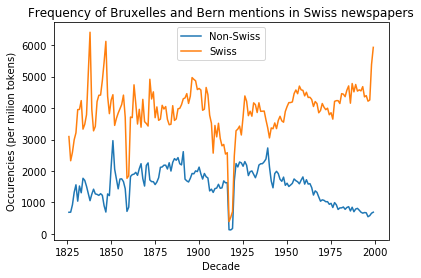

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = df_non_swiss_groups.plot(x = 'date', y='ppm')
df_swiss_groups.plot(x = 'date', y='ppm', ax=ax)
ax.set_ylabel("Occurencies (per milion tokens)")
ax.set_xlabel("Decade")
ax.legend(["Non-Swiss", "Swiss"])
ax.set_title("Frequency of Bruxelles and Bern mentions in Swiss newspapers")
plt.savefig("cities.png", dpi=600)

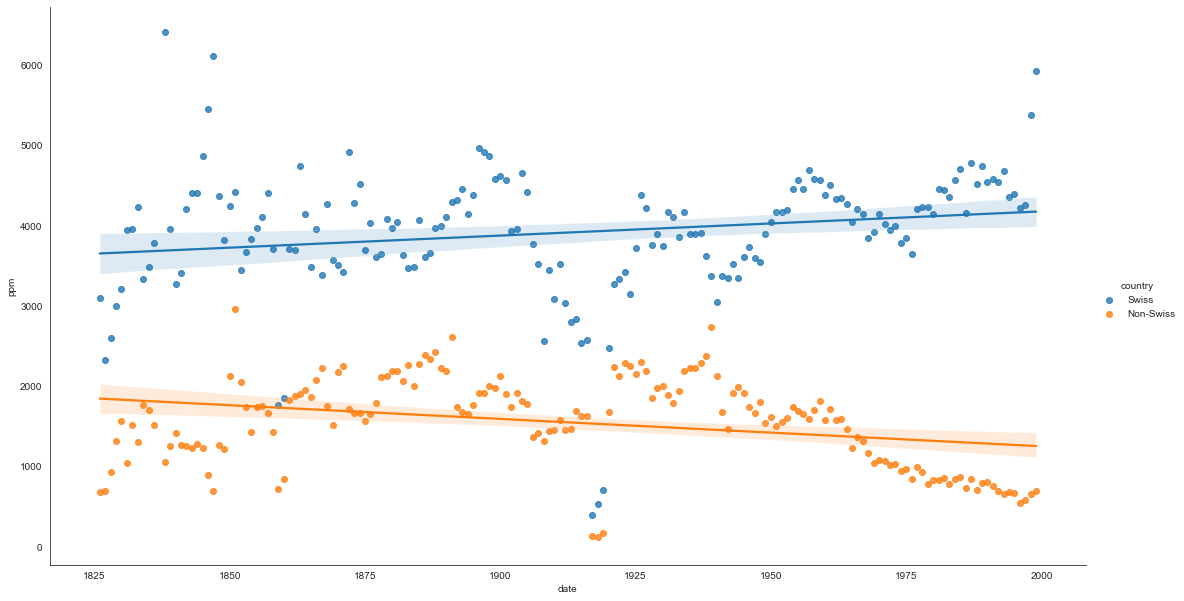

In [7]:
df_swiss_groups_sns = df_swiss_groups
df_swiss_groups_sns["country"] = "Swiss"

df_non_swiss_groups_sns = df_non_swiss_groups
df_non_swiss_groups_sns["country"] = "Non-Swiss"
sns_data = pd.concat([df_swiss_groups_sns, df_non_swiss_groups_sns])

sns.set_style("white")
sns.lmplot(x= 'date', y='ppm', hue='country', data=sns_data, height=8.27, aspect=11/6)
plt.savefig("reg.png", dpi=600)